# MU4MEF04 –Méthodes Numériques pour les écoulements incompressibles- S1


## TP3 Polynômes de Chebyshev - Formulation τ - formulation de collocation
### Master SPI – MSH
#### ZHOU Zixin 28609845

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.sparse as sps
import math

On va résoudre l'équation de la chaleur stationnaire en 1 dimension sur [-1,1]
$$
\Delta u=0
$$
avec la condition de Dirichlet $u(-1)=0, u(1)=1$.


#### 1. donner la solution analytique de cette équation

Cette équation de la chaleur stationnaire est en 1 dimension:

$$
u=ax+b
$$

On sait aussi que $u(-1)=0, u(1)=1$, donc

$$
u=\frac{x}{2} +  \frac{1}{2}
$$

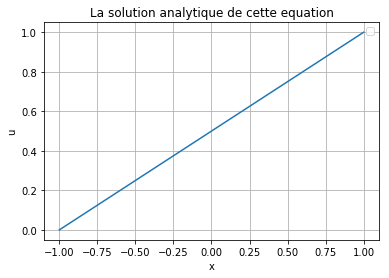

In [2]:
N = 51
x = np.linspace(-1, 1, N)  
u = 0.5 * x + 0.5

plt.figure()
plt.xlabel("x")
plt.ylabel("u")
plt.title("La solution analytique de cette equation")
plt.grid()
plt.plot(x,u)
plt.legend() 
plt.show()

On considère une discrétisation de Chebyshev sur 51 points.
#### 2. écrire les matrices de passage de l'espace spectral vers l'espace physique et réciproquement

In [3]:
#Le matrices de passage de l'espace spectral vers l'espace physique
def M_phsp(N):
    M       = np.eye(N)
    for n in range(0,N):
        for j in range(0,N):
            M[j,n] = math.cos(n * j * math.pi / N)
    return M

#Le matrices de passage de l'espace physique vers l'espace spectral
def M_spph(N):
    M       = np.eye(N)
    cjp     = np.ones(N)
    cjp[0]  = 2.
    cjp[-1] = 2.
    cnp     = np.ones(N)
    cnp[0]  = 2.
    cnp[-1] = 2.
    for n in range(0,N):
        for j in range(0,N):
            M[n,j] = (2. / (cnp[n] * cjp[j] * N)) * math.cos(n * j * math.pi / N)
    return M

print "Le matrices de passage de l'espace spectral vers l'espace physique"
print M_phsp(N)

print "Le matrices de passage de l'espace physique vers l'espace spectral"
print M_spph(N)

Le matrices de passage de l'espace spectral vers l'espace physique
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.          0.99810333  0.99242051 ... -0.9829731  -0.99242051
  -0.99810333]
 [ 1.          0.99242051  0.96979694 ...  0.93247223  0.96979694
   0.99242051]
 ...
 [ 1.         -0.9829731   0.93247223 ... -0.85021714  0.93247223
  -0.9829731 ]
 [ 1.         -0.99242051  0.96979694 ...  0.93247223 -0.96979694
   0.99242051]
 [ 1.         -0.99810333  0.99242051 ... -0.9829731   0.99242051
  -0.99810333]]
Le matrices de passage de l'espace physique vers l'espace spectral
[[ 0.00980392  0.01960784  0.01960784 ...  0.01960784  0.01960784
   0.00980392]
 [ 0.01960784  0.03914131  0.03891845 ... -0.03854796 -0.03891845
  -0.01957065]
 [ 0.01960784  0.03891845  0.03803125 ...  0.03656754  0.03803125
   0.01945923]
 ...
 [ 0.01960784 -0.03854796  0.03656754 ... -0.03334185  0.03656754
  -0.01927398]
 [ 0.01960784 -0.03891845  0.03803125 ...  0.03656754

#### 3. écrire la matrice de dérivation dans l'espace spectral

In [4]:
#La matrice de derivation dans l'espace spectral
def D_sp(N):
    D     = np.zeros((N,N))
    cn    = np.ones(N)
    cn[0] = 2.
    for i in range(0,N):
        for j in range(1,N):
            if j > i:
                if D[i,j-1] == 0:
                    D[i,j] = 2 * j / cn[i]
    return D

print "La matrice de derivation dans l'espace spectral"
print D_sp(N)

La matrice de derivation dans l'espace spectral
[[  0.   1.   0. ...   0.  49.   0.]
 [  0.   0.   4. ...  96.   0. 100.]
 [  0.   0.   0. ...   0.  98.   0.]
 ...
 [  0.   0.   0. ...   0.  98.   0.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0.   0.]]


#### 4. résoudre l'équation avec la méthode $\tau$ :
 - former second membre (les deux dernières lignes contiennent les conditions aux limites)
 - former opérateur et inverser

In [5]:
#Opérateur de la méthode tau
def M_tau(N):
    M           = np.dot(D_sp(N),D_sp(N))
    M[-1,:]     = 1.
    for i in range(0,N):
        M[-2,i] = ( - 1) ** i
    return M

print 'La methode tau'
print M_tau(N)

#Inverser
print 'Matrice inverser'
print np.linalg.inv(M_tau(N))

La methode tau
[[ 0.0000e+00  0.0000e+00  4.0000e+00 ...  5.5296e+04  0.0000e+00
   6.2500e+04]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  1.1760e+05
   0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  1.1040e+05  0.0000e+00
   1.2480e+05]
 ...
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
   9.8000e+03]
 [ 1.0000e+00 -1.0000e+00  1.0000e+00 ...  1.0000e+00 -1.0000e+00
   1.0000e+00]
 [ 1.0000e+00  1.0000e+00  1.0000e+00 ...  1.0000e+00  1.0000e+00
   1.0000e+00]]
Matrice inverser
[[-2.50000000e-01  0.00000000e+00  1.45833333e-01 ... -5.66369008e-07
   5.00000000e-01  5.00000000e-01]
 [ 0.00000000e+00 -4.16666667e-02  0.00000000e+00 ...  0.00000000e+00
  -5.00000000e-01  5.00000000e-01]
 [ 2.50000000e-01  0.00000000e+00 -1.66666667e-01 ...  1.79164409e-17
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.17108120e-04
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 .

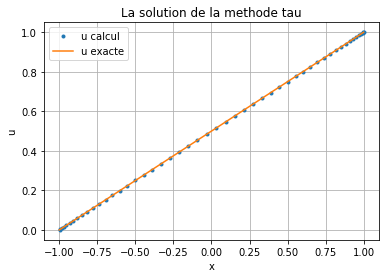

In [6]:
#Secoud membre
s     = np.zeros(N)
s[-1] = 1

#Le u calcul
u_cal = np.linalg.solve(M_tau(N), s)
u_cal = np.dot(M_phsp(N),u_cal)

#Les points de Gauss-Lobatto 
k  = np.linspace(0, N-1, N)
xk = (np.cos(k * np.pi / N))

plt.figure()
plt.xlabel("x")
plt.ylabel("u")
plt.title("La solution de la methode tau")
plt.grid()
plt.plot(xk,u_cal,'.',label = "u calcul")
plt.plot(x,u,label = "u exacte")
plt.legend() 
plt.show()

#### 5. écrire la matrice de dérivation dans l'espace physique

In [7]:
#La matrice de dérivation double dans l'espace physique
def Dd_pp(N):
    A = np.dot(D_sp(N), D_sp(N))
    B = np.dot(M_phsp(N),A)
    D = np.dot(B,M_spph(N))
    return D

print "La matrice de derivation dans l'espace physique"
print Dd_pp(N)

La matrice de derivation dans l'espace physique
[[ 4.08496667e+05 -6.31936235e+05  3.03287304e+05 ... -2.31372373e+03
   1.93623913e+03 -8.54568176e+02]
 [ 1.95239159e+05 -2.71713821e+05  8.17490149e+04 ... -3.79659808e+02
   2.55887618e+02 -9.07165452e+01]
 [-9.74020227e+03  4.37093686e+04 -5.51361406e+04 ...  1.13480901e+02
  -8.26015571e+01  3.20131073e+01]
 ...
 [ 1.98209592e+01 -4.23877919e+01  5.06148178e+01 ... -2.36042831e+04
   1.63713555e+04 -1.92448640e+03]
 [-2.89132346e+01  6.40262146e+01 -8.26015571e+01 ...  2.27570885e+04
  -5.51361406e+04  2.18546843e+04]
 [ 7.82915056e+01 -1.81433090e+02  2.55887618e+02 ...  2.58253831e+02
   8.17490149e+04 -1.35856910e+05]]


#### 6. résoudre l'équation avec la formulation de collocation
 - former second membre (la première et la dernière lignes contiennent les conditions aux limites)
 - former opérateur et inverser

In [8]:
#Opérateur de la formulation de collocation
def F_collocation(N):
    F          = np.dot(Dd_pp(N),Dd_pp(N))
    F[0,0]     = 1.
    F[0,1:]    = 0.
    F[-1,0:-1] = 0.
    F[-1,-1]   = 1.
    return F

print 'La formulation de collocation'
print F_collocation(N)

#Inverser
print 'Matrice inverser'
print np.linalg.inv(F_collocation(N))


La formulation de collocation
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.58707141e+10 -4.59068640e+10  3.24537129e+10 ... -3.45456460e+08
   2.99473006e+08 -1.34072199e+08]
 [ 5.12646433e+09 -8.23680695e+09  4.04826526e+09 ... -1.50087804e+06
   9.05307273e+05 -1.05448966e+06]
 ...
 [-5.99615048e+05  1.42687345e+06 -2.10894628e+06 ...  1.02880095e+09
  -1.46958193e+09  6.69483021e+08]
 [ 2.14150469e+06 -5.21823329e+06  8.02034791e+06 ... -1.79978134e+09
   5.21569825e+09 -4.22686516e+09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]
Matrice inverser
[[ 1.00000000e+00  7.07244079e-12  1.02054717e-10 ...  5.28077076e-13
  -2.45828588e-13 -1.18568430e-09]
 [ 1.00000005e+00 -2.18359171e-03  8.62554293e-03 ... -9.79031828e-05
  -4.77926219e-05 -4.99999932e-01]
 [ 9.96206802e-01 -5.78709001e-03  2.28599489e-02 ... -2.59785392e-04
  -1.26876251e-04  1.89685445e-03]
 .

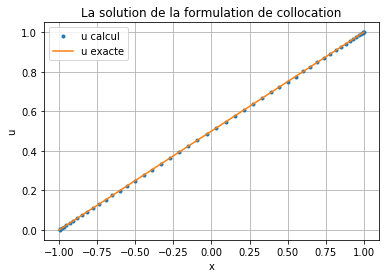

In [9]:
#Secoud membre
s       = np.zeros(N)
s[0]   = 1

#Le u calcul
u_cal = np.linalg.solve(F_collocation(N), s)

#Les points de Gauss-Lobatto 
k  = np.linspace(0,N-1,N)
xk = (np.cos(k * np.pi / N))

plt.figure()
plt.xlabel("x")
plt.ylabel("u")
plt.title("La solution de la formulation de collocation")
plt.grid()
plt.plot(xk,u_cal,'.',label = "u calcul")
plt.plot(x,u,label = "u exacte")
plt.legend() 
plt.show()

7. construire un objet (par exemple une fonction [phsp, spph, ddxphys, Dspec] = chebyderiv(n) en matlab ou un module python) qui renvoie pour une discrétisation de $\mathrm{n}$ points les matrices de passage et les matrices de dérivation dans l'espace spectral et dans l'espace physique


In [10]:
def chebyderiv(N):
    
    #Le matrices de passage de l'espace spectral vers l'espace physique
    phsp = np.eye(N)
    for n in range(0,N):
        for j in range(0,N):
             phsp[j,n] = math.cos(n * j * math.pi / N)

    #Le matrices de passage de l'espace physique vers l'espace spectral
    spph    = np.eye(N)
    cjp     = np.ones(N)
    cjp[0]  = 2.
    cjp[-1] = 2.
    cnp     = np.ones(N)
    cnp[0]  = 2.
    cnp[-1] = 2.
    for n in range(0,N):
        for j in range(0,N):
            spph [n,j] = (2. / (cnp[n] * cjp[j] * N)) * math.cos(n * j * math.pi / N)

    #La matrice de derivation dans l'espace spectral
    Dspec = np.zeros((N,N))
    cn    = np.ones(N)
    cn[0] = 2.
    for i in range(0,N):
        for j in range(1,N):
            if j > i:
                if Dspec[i,j-1] == 0:
                    Dspec[i,j] = 2 * j / cn[i]
    
    #La matrice de dérivation double dans l'espace physique
    A       = np.dot(Dspec,Dspec)
    B       = np.dot(spph,A)
    ddxphys = np.dot(B,phsp)
    return phsp, spph, Dspec, ddxphys

chebyderiv(N)

(array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  0.99810333,  0.99242051, ..., -0.9829731 ,
         -0.99242051, -0.99810333],
        [ 1.        ,  0.99242051,  0.96979694, ...,  0.93247223,
          0.96979694,  0.99242051],
        ...,
        [ 1.        , -0.9829731 ,  0.93247223, ..., -0.85021714,
          0.93247223, -0.9829731 ],
        [ 1.        , -0.99242051,  0.96979694, ...,  0.93247223,
         -0.96979694,  0.99242051],
        [ 1.        , -0.99810333,  0.99242051, ..., -0.9829731 ,
          0.99242051, -0.99810333]]),
 array([[ 0.00980392,  0.01960784,  0.01960784, ...,  0.01960784,
          0.01960784,  0.00980392],
        [ 0.01960784,  0.03914131,  0.03891845, ..., -0.03854796,
         -0.03891845, -0.01957065],
        [ 0.01960784,  0.03891845,  0.03803125, ...,  0.03656754,
          0.03803125,  0.01945923],
        ...,
        [ 0.01960784, -0.03854796,  0.03656754, ..., -